In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [2]:
data = pd.read_csv(r"E:\Nextstep\Scaler\Business-Case-Study\Ola\Dataset\ola_driver_scaler.csv")
data.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [4]:
data.describe()

,Unnamed: 0,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,9551.500000,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,5514.994107,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,0.000000,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,4775.750000,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,9551.500000,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,14327.250000,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,19103.000000,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [5]:
data.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


## Unique Values

In [6]:
data.nunique()

Unnamed: 0              19104
MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

In [7]:
for col in data.columns:
    if data[col].nunique() < 6:
        print(col, ": ",  data[col].unique())

Gender :  [ 0.  1. nan]
Education_Level :  [2 0 1]
Joining Designation :  [1 2 3 4 5]
Grade :  [1 2 3 4 5]
Quarterly Rating :  [2 1 4 3]


#### Inference:
- Unnamed: 0 contains unique values, doesn't helpful for EDA and model building
- 24 reporting days of drivers are collected in the dataset
- Total number of drivers in the dataset are 2381
- Dataset Characteristics
    - No of drivers: 2381
    - No. of Cities: 29
    - Joining designation are sectored into 5 categories (1 to 5)
    - 5 different grades are given to the drivers (1 to 5)
    - Quarterly ratings are grouped as 4 categories (1 to 4)

## Null values

In [8]:
data.isnull().sum()

Unnamed: 0                  0
MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [24]:
data['LWD_Flag'] = data['LastWorkingDate'].fillna(0)
data['LWD_Flag'] = data['LWD_Flag'].apply(lambda x: 1 if x!=0 else 0)
data_grp = data.groupby('Driver_ID')['LWD'].sum().value_counts()

1    1616
0     765
Name: LWD, dtype: int64

In [ ]:
#### Inference:
- No. of unique drivers: 2381
- No. of Active drivers: 765 (No last working date)
- No. of inactive drivers: 1616 

In [14]:
data['Driver_ID'].nunique()

2381

## 
- Age: Max


In [39]:
df = pd.DataFrame(index=data['Driver_ID'].unique())
#df['Driver_ID'] = 
cols = list(data.columns)
for i in range(1, data.shape[1]):
    if cols[i] == "Driver_ID":
        continue
    df[cols[i]] = data.groupby("Driver_ID")[cols[i]].unique()
df.head()

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,LWD,LWD_Flag
1,"[01/01/19, 02/01/19, 03/01/19]",[28.0],[0.0],[C23],[2],[57387],[24/12/18],"[nan, 03/11/19]",[1],[1],"[2381060, -665480, 0]",[2],"[0, 1]","[0, 1]"
2,"[11/01/20, 12/01/20]",[31.0],[0.0],[C7],[2],[67016],[11/06/20],[nan],[2],[2],[0],[1],[0],[0]
4,"[12/01/19, 01/01/20, 02/01/20, 03/01/20, 04/01...",[43.0],[0.0],[C13],[2],[65603],[12/07/19],"[nan, 27/04/20]",[2],[2],"[0, 350000]",[1],"[0, 1]","[0, 1]"
5,"[01/01/19, 02/01/19, 03/01/19]",[29.0],[0.0],[C9],[0],[46368],[01/09/19],"[nan, 03/07/19]",[1],[1],"[0, 120360]",[1],"[0, 1]","[0, 1]"
6,"[08/01/20, 09/01/20, 10/01/20, 11/01/20, 12/01...",[31.0],[1.0],[C11],[1],[78728],[31/07/20],[nan],[3],[3],"[0, 1265000]","[1, 2]",[0],[0]


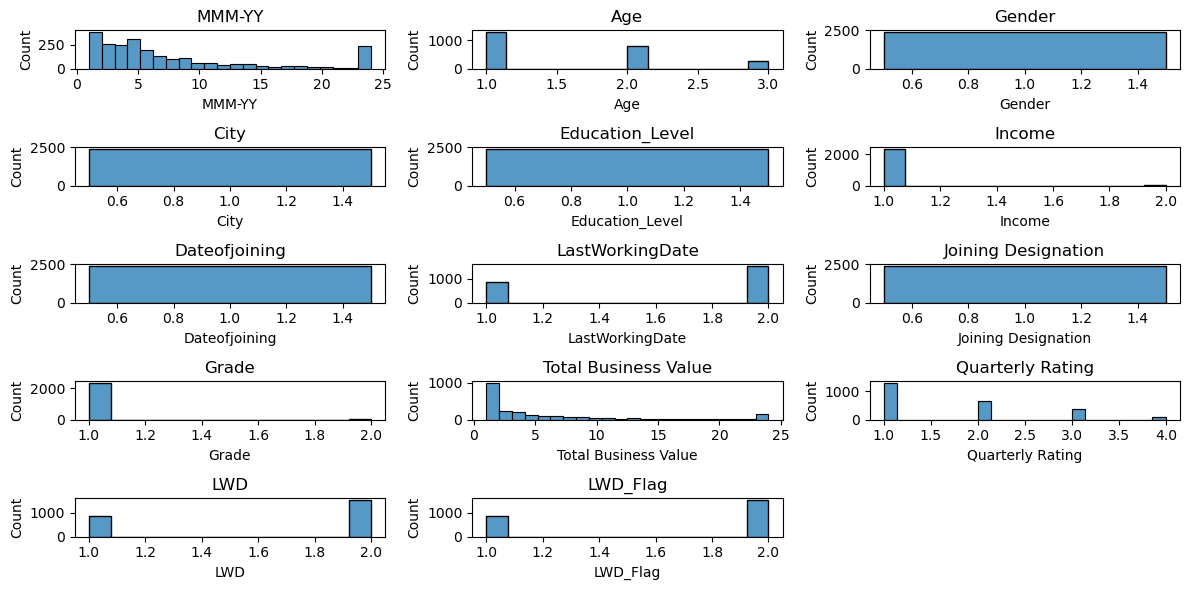

In [65]:
# Check length of unique values in the features in the dataset
plt.figure(figsize=(12,6))
cols_df = list(df.columns)
cnt = 1
for col in cols_df:
    plt.subplot(5,3, cnt)
    sns.histplot(df[col].apply(remove_null).apply(len))
    plt.title(col)
    cnt += 1    
plt.tight_layout()

In [66]:
df[df['Grade'].apply(len) > 1]

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,LWD,LWD_Flag
26,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[41.0, 42.0, 43.0]",[0.0],[C14],[2],"[121529, 132577]",[05/07/18],[nan],[1],"[3, 4]","[243110, 646330, 17651940, 242510, 1098080, 12...","[4, 2]",[0],[0]
54,"[07/01/19, 08/01/19, 09/01/19, 10/01/19, 11/01...","[33.0, 34.0, 35.0]",[0.0],[C29],[1],"[117993, 127826]",[07/11/19],[nan],[4],"[4, 5]","[0, 2000000, 1950000, 1455010, 3398000, 606247...","[2, 3, 4, 1]",[0],[0]
60,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[46.0, 47.0, 48.0]",[1.0],[C20],[0],"[82126, 89592]",[17/09/16],[nan],[1],"[3, 4]","[913700, 1435000, 7799990, 999000, 250000, 500...","[4, 3, 2]",[0],[0]
98,"[08/01/19, 09/01/19, 10/01/19, 11/01/19, 12/01...","[24.0, 25.0]",[0.0],[C16],[0],"[57977, 63774]",[15/08/19],"[nan, 25/12/20]",[2],"[2, 3]","[0, 1374540, 5250000, 2256470, 1410000, 299900...","[3, 4, 1, 2]","[0, 1]","[0, 1]"
275,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[39.0, 40.0, 41.0]",[0.0],[C20],[0],"[89124, 97226]",[05/02/16],[nan],[1],"[3, 4]","[2978880, 875840, 2513360, 371310, 638520, 0, ...","[3, 2, 4, 1]",[0],[0]
307,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[37.0, 38.0, 39.0]",[0.0],[C26],[0],"[80856, 88207]",[10/05/18],"[nan, 26/10/20]",[2],"[3, 4]","[2368600, 1577000, 16079420, 1200000, 0, 21404...","[4, 3, 1]","[0, 1]","[0, 1]"
320,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[27.0, 28.0]",[1.0],[C20],[0],"[56813, 63126]",[13/07/18],[nan],[1],"[1, 2]","[100050, 1675060, 3800670, 545950, 1833110, 26...",[4],[0],[0]
368,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[43.0, 44.0, 45.0]",[0.0],[C23],[1],"[46719, 51911]",[18/09/18],[nan],[1],"[1, 2]","[1254620, 1331810, 2031450, 125290, 2678110, 1...","[4, 2]",[0],[0]
434,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[28.0, 29.0, 30.0]",[1.0],[C6],[2],"[80469, 88515]",[08/11/17],[nan],[1],"[2, 3]","[5033020, 1925490, 3148500, 0, 194010, 300690,...","[4, 2]",[0],[0]
537,"[12/01/19, 01/01/20, 02/01/20, 03/01/20, 04/01...","[34.0, 35.0]",[1.0],[C29],[1],"[76868, 84554]",[12/06/19],[nan],[2],"[2, 3]","[0, 1914780, 3343490, 5931040, 499040, 1168740...","[1, 4]",[0],[0]


In [67]:
df[df['Income'].apply(len) > 1]

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,LWD,LWD_Flag
26,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[41.0, 42.0, 43.0]",[0.0],[C14],[2],"[121529, 132577]",[05/07/18],[nan],[1],"[3, 4]","[243110, 646330, 17651940, 242510, 1098080, 12...","[4, 2]",[0],[0]
54,"[07/01/19, 08/01/19, 09/01/19, 10/01/19, 11/01...","[33.0, 34.0, 35.0]",[0.0],[C29],[1],"[117993, 127826]",[07/11/19],[nan],[4],"[4, 5]","[0, 2000000, 1950000, 1455010, 3398000, 606247...","[2, 3, 4, 1]",[0],[0]
60,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[46.0, 47.0, 48.0]",[1.0],[C20],[0],"[82126, 89592]",[17/09/16],[nan],[1],"[3, 4]","[913700, 1435000, 7799990, 999000, 250000, 500...","[4, 3, 2]",[0],[0]
98,"[08/01/19, 09/01/19, 10/01/19, 11/01/19, 12/01...","[24.0, 25.0]",[0.0],[C16],[0],"[57977, 63774]",[15/08/19],"[nan, 25/12/20]",[2],"[2, 3]","[0, 1374540, 5250000, 2256470, 1410000, 299900...","[3, 4, 1, 2]","[0, 1]","[0, 1]"
275,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[39.0, 40.0, 41.0]",[0.0],[C20],[0],"[89124, 97226]",[05/02/16],[nan],[1],"[3, 4]","[2978880, 875840, 2513360, 371310, 638520, 0, ...","[3, 2, 4, 1]",[0],[0]
307,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[37.0, 38.0, 39.0]",[0.0],[C26],[0],"[80856, 88207]",[10/05/18],"[nan, 26/10/20]",[2],"[3, 4]","[2368600, 1577000, 16079420, 1200000, 0, 21404...","[4, 3, 1]","[0, 1]","[0, 1]"
320,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[27.0, 28.0]",[1.0],[C20],[0],"[56813, 63126]",[13/07/18],[nan],[1],"[1, 2]","[100050, 1675060, 3800670, 545950, 1833110, 26...",[4],[0],[0]
368,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[43.0, 44.0, 45.0]",[0.0],[C23],[1],"[46719, 51911]",[18/09/18],[nan],[1],"[1, 2]","[1254620, 1331810, 2031450, 125290, 2678110, 1...","[4, 2]",[0],[0]
434,"[01/01/19, 02/01/19, 03/01/19, 04/01/19, 05/01...","[28.0, 29.0, 30.0]",[1.0],[C6],[2],"[80469, 88515]",[08/11/17],[nan],[1],"[2, 3]","[5033020, 1925490, 3148500, 0, 194010, 300690,...","[4, 2]",[0],[0]
537,"[12/01/19, 01/01/20, 02/01/20, 03/01/20, 04/01...","[34.0, 35.0]",[1.0],[C29],[1],"[76868, 84554]",[12/06/19],[nan],[2],"[2, 3]","[0, 1914780, 3343490, 5931040, 499040, 1168740...","[1, 4]",[0],[0]


In [64]:
def remove_null(x):
    try:
        return x[~np.isnan(x)]
    except:
        return x

#### Inference:
- Age:
    - Multiple Age for the same driver is identified, indicates the increase in age
    - Mean Age while grouping
- Grading:
    - Multiple grading for the same driver is identified
    - Calculate change in grading (Current - Initial)
    - Recent Grading
- Gender, City, Education Level, Date of Joining, Joining Designation:
    - Unique values for the driver
- Last Working Date:
    - if no last working date then active driver
- Quarterly Rating:
    - Multiple rating for the same driver is identified
    - Calculation change in rating (current - initial)
- Business Value:
    - Multiple Business value for the same driver is identified
    - Mean business value while grouping
    - No. of negative business value
- Income:
    - Observed Multiple income for single driver
    - Average income, Recent income

<Axes: xlabel='Gender', ylabel='Count'>

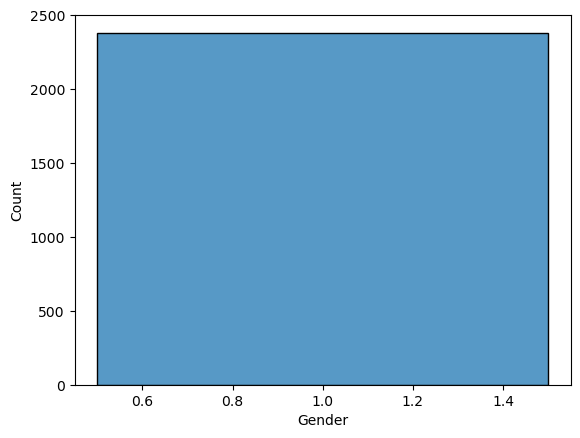

In [62]:
df_final = pd.DataFrame(index=data['Driver_ID'].unique())